In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [554]:
# Specify k
k = 5

In [555]:
# Import k-dependent data
path = f'data/synapse_clusters/with_sequences/clusters_k{k}.csv'
clusters_w_seq = pd.read_csv(path, index_col=0)
print(clusters_w_seq.shape)
display(clusters_w_seq.head())

(74167, 16)


,synapse_id_0,synapse_id_1,synapse_id_2,synapse_id_3,synapse_id_4,density_score,post_pt_root_id,post_cell_type,centroid_x,centroid_y,centroid_z,sequence_rank_0,sequence_rank_1,sequence_rank_2,sequence_rank_3,sequence_rank_4
cluster_id,,,,,,,,,,,,,,,,
0,923889,912217,906864,900422,941001,0.413845,864691134884741370,4P,573.3296,689.8856,1049.288,864691135420483058,864691135463697733,864691135415448506,864691136740412764,864691135684083895
1,677928,680389,677164,678984,681563,0.456460,864691134884742906,6P-IT,500.4736,1020.7520,1002.048,864691135776654432,864691135776654432,864691136973670940,864691135307087430,864691135307087430
2,657643,695427,680348,675225,679270,0.409908,864691134884742906,6P-IT,417.8064,574.3232,903.032,864691135404012526,864691135660521712,864691135660521712,864691135660521712,864691135660521712
3,674327,704519,662648,676483,709257,0.418260,864691134884742906,6P-IT,488.3336,877.0656,937.072,864691136378754261,864691136903065778,864691135772039931,864691136740406620,864691135730118585
4,708116,673286,684750,713306,690728,0.446153,864691134884742906,6P-IT,586.6272,744.3880,882.984,864691135488499770,864691135462245533,864691135501549378,864691134988717434,864691135855775022


In [556]:
864691134884741370, 864691135420483058, 864691135463697733, 864691135415448506, 864691136740412764, 864691135684083895

(864691134884741370,
 864691135420483058,
 864691135463697733,
 864691135415448506,
 864691136740412764,
 864691135684083895)

In [557]:
np.matmul(np.array([573.3296, 689.8856, 1049.288]), np.diag([1000/4, 1000/4, 1000/40]))

array([143332.4, 172471.4,  26232.2])

In [558]:
display(clusters_w_seq.iloc[0])

synapse_id_0                   923889
synapse_id_1                   912217
synapse_id_2                   906864
synapse_id_3                   900422
synapse_id_4                   941001
density_score                0.413845
post_pt_root_id    864691134884741370
post_cell_type                     4P
centroid_x                   573.3296
centroid_y                   689.8856
centroid_z                   1049.288
sequence_rank_0    864691135420483058
sequence_rank_1    864691135463697733
sequence_rank_2    864691135415448506
sequence_rank_3    864691136740412764
sequence_rank_4    864691135684083895
Name: 0, dtype: object

In [559]:
# Slim down to just the sequences
seq_keys = [f'sequence_rank_{i}' for i in range(k)]
sequences = clusters_w_seq[seq_keys]
print(sequences.shape)
display(sequences.head())
# sequences.to_csv(f'data/real_sequences/sequences_k{k}.csv')

(74167, 5)


,sequence_rank_0,sequence_rank_1,sequence_rank_2,sequence_rank_3,sequence_rank_4
cluster_id,,,,,
0,864691135420483058,864691135463697733,864691135415448506,864691136740412764,864691135684083895
1,864691135776654432,864691135776654432,864691136973670940,864691135307087430,864691135307087430
2,864691135404012526,864691135660521712,864691135660521712,864691135660521712,864691135660521712
3,864691136378754261,864691136903065778,864691135772039931,864691136740406620,864691135730118585
4,864691135488499770,864691135462245533,864691135501549378,864691134988717434,864691135855775022


In [560]:
# Count the number of repeated sequences
def count_appearances(sequences):
    counts = {}
    for sequence in sequences.to_numpy():
        sequence = tuple(sequence)
        if sequence in counts:
            counts[sequence] += 1
        elif sequence[::-1] in counts:
            counts[sequence[::-1]] += 1
        else:
            counts[sequence] = 1
    return counts

In [561]:
appearances = count_appearances(sequences)
appearance_counts = np.array(list(appearances.values()))
repeat_counts = appearance_counts[appearance_counts > 1]
total_repeats = np.sum(repeat_counts)
print(f'Total repeats: {total_repeats}')

Total repeats: 2471


In [562]:
# Create id --> unicode mapping
clusters_w_id = pd.read_csv(f'data/synapse_clusters/with_pre_ids/clusters_k{k}.csv', index_col=0)
key_ids = [f'pre_pt_root_id_{i}' for i in range(k)]
cluster_ids = clusters_w_id[key_ids]
display(cluster_ids.head())

,pre_pt_root_id_0,pre_pt_root_id_1,pre_pt_root_id_2,pre_pt_root_id_3,pre_pt_root_id_4
cluster_id,,,,,
0,864691135463697733,864691135420483058,864691135415448506,864691136740412764,864691135684083895
1,864691135776654432,864691135776654432,864691136973670940,864691135307087430,864691135307087430
2,864691135660521712,864691135660521712,864691135404012526,864691135660521712,864691135660521712
3,864691136378754261,864691136903065778,864691135772039931,864691136740406620,864691135730118585
4,864691135488499770,864691135462245533,864691135501549378,864691134988717434,864691135855775022


In [563]:
unique_ids = set(cluster_ids.values.flatten())
print(len(unique_ids))

35548


In [564]:
unicode_to_id = {chr(char): pre_id for char, pre_id in enumerate(unique_ids)}
id_to_unicode = {pre_id: chr(char) for char, pre_id in enumerate(unique_ids)}

In [565]:
# Print the keys of appearances with the highest values
def print_top_appearances(appearances, n=10):
    sorted_appearances = sorted(appearances.items(), key=lambda x: x[1], reverse=True)
    for sequence, count in sorted_appearances[:n]:
        mapped_sequence = [id_to_unicode[pre_id] for pre_id in sequence]
        print(f'{mapped_sequence}: {count}')

In [566]:
print_top_appearances(appearances)

['ႁ', 'ႁ', 'ႁ', 'ႁ', 'ႁ']: 76
['ႄ', 'ႄ', 'ႄ', 'ႄ', 'ႄ']: 47
['嗜', '嗜', '嗜', '嗜', '嗜']: 35
['橡', '橡', '橡', '橡', '橡']: 33
['娦', '娦', '娦', '娦', '娦']: 29
['䎱', '䎱', '䎱', '䎱', '䎱']: 26
['眔', '眔', '眔', '眔', '眔']: 26
['㷔', '㷔', '㷔', '㷔', '㷔']: 26
['⺺', '⺺', '⺺', '⺺', '⺺']: 24
['寈', '寈', '寈', '寈', '寈']: 23


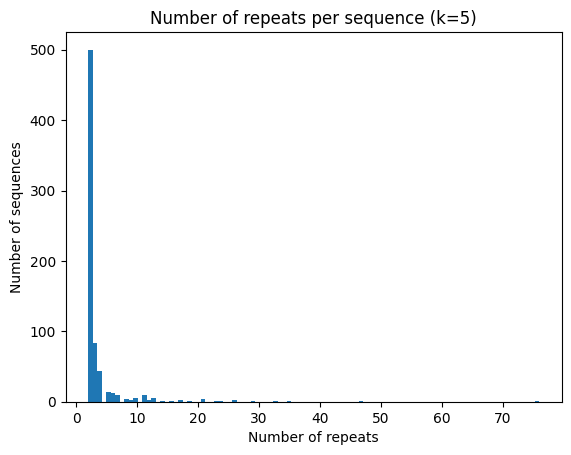

In [567]:
plt.hist(repeat_counts, bins=100)
plt.title(f'Number of repeats per sequence (k={k})')
plt.xlabel('Number of repeats')
plt.ylabel('Number of sequences')
# plt.savefig(f'repeats_per_sequence_k{k}.png')
plt.show()

In [568]:
appearances_df = pd.DataFrame(appearances.items(), columns=['sequence', 'count'])
appearances_df.loc[:, 'diversity'] = appearances_df['sequence'].apply(lambda x: len(set(x)))
display(appearances_df.head())

,sequence,count,diversity
0,"(864691135420483058, 864691135463697733, 86469...",1,5
1,"(864691135776654432, 864691135776654432, 86469...",1,3
2,"(864691135404012526, 864691135660521712, 86469...",1,2
3,"(864691136378754261, 864691136903065778, 86469...",1,5
4,"(864691135488499770, 864691135462245533, 86469...",1,5


In [569]:
# appearances_df.to_csv(f'data/sequence_counts/sequence_counts_k{k}.csv')

In [570]:
# Specify required diversity for sequences
diversity_thresh = 0.5
required_diversity = diversity_thresh * k

In [593]:
high_diversity_df = appearances_df[appearances_df['diversity'] > required_diversity]
print(appearances_df.shape)
print(high_diversity_df.shape)
display(high_diversity_df.head())

(72408, 3)
(62743, 3)


,sequence,count,diversity
0,"(864691135420483058, 864691135463697733, 86469...",1,5
1,"(864691135776654432, 864691135776654432, 86469...",1,3
3,"(864691136378754261, 864691136903065778, 86469...",1,5
4,"(864691135488499770, 864691135462245533, 86469...",1,5
5,"(864691135585153148, 864691135570709485, 86469...",1,5


In [572]:
high_div_appearance_counts = high_diversity_df['count'].to_numpy()
high_div_repeat_counts = high_div_appearance_counts[high_div_appearance_counts > 1]
high_div_total_repeats = np.sum(high_div_repeat_counts)
print(f'Total high diversity repeats: {high_div_total_repeats}')

Total high diversity repeats: 48


In [602]:
display(high_diversity_df.loc[high_diversity_df['count'] > 1].loc[high_diversity_df['diversity'] == 5])

,sequence,count,diversity
66245,"(864691136123673382, 864691135939799462, 86469...",2,5


In [574]:
n = 5
n_repeats = appearances_df[appearances_df['count'] == n]
n_repeats_chars = n_repeats['sequence'].apply(lambda x: [id_to_unicode[pre_id] for pre_id in x])
display(n_repeats.head())
display(n_repeats_chars)
print(n_repeats_chars.shape)

,sequence,count,diversity
1620,"(864691134988824442, 864691134988824442, 86469...",5,1
2749,"(864691135081755639, 864691135081755639, 86469...",5,1
3160,"(864691135848136286, 864691135848136286, 86469...",5,1
6180,"(864691135181703682, 864691135181703682, 86469...",5,1
6963,"(864691135585414780, 864691135585414780, 86469...",5,1


1620     [౼, ౼, ౼, ౼, ౼]
2749     [඗, ඗, ඗, ඗, ඗]
3160     [ဿ, ဿ, ဿ, ဿ, ဿ]
6180     [嬢, 嬢, 嬢, 嬢, 嬢]
6963     [撞, 撞, 撞, 撞, 撞]
10686    [吮, 吮, 吮, 吮, 吮]
12121    [ὁ, ὁ, ὁ, ὁ, ὁ]
13286    [⽽, ⽽, ⽽, ⽽, ⽽]
16098    [ɜ, ɜ, ɜ, ɜ, ɜ]
17381    [橈, 橈, 橈, 橈, 橈]
18031    [寊, 寊, 寊, 寊, 寊]
21287    [㰶, 㰶, 㰶, 㰶, 㰶]
24168    [䢫, 䢫, 䢫, 䢫, 䢫]
24714    [夶, 夶, 夶, 夶, 夶]
Name: sequence, dtype: object

(14,)


count    14.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: sequence, dtype: float64

<AxesSubplot:>

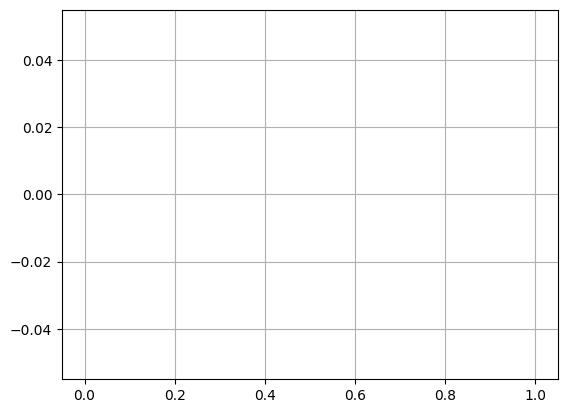

In [575]:
n_repeats_diversity = n_repeats_chars.apply(lambda x: len(set(x)))
n_repeats_high_div = n_repeats_diversity[n_repeats_diversity > 3]
display(n_repeats_diversity.describe())
n_repeats_high_div.hist(bins=2)

In [576]:
n_repeats_chars.loc[n_repeats_diversity > 3]

Series([], Name: sequence, dtype: object)

In [577]:
# Filter out sequences that don't meet the diversity threshold
def filter_sequences(sequences, appearances, required_diversity):
    filtered_sequences = []
    filtered_appearances = {}
    for sequence in sequences:
        sequence = tuple(sequence)
        if len(set(sequence)) > required_diversity:
            filtered_sequences.append(sequence)
            if sequence in appearances:
                filtered_appearances[tuple(sequence)] = appearances[tuple(sequence)]
            elif sequence[::-1] in appearances:
                filtered_appearances[tuple(sequence[::-1])] = appearances[tuple(sequence[::-1])]
    return filtered_sequences, filtered_appearances

In [578]:
filtered_sequences, filtered_appearances = filter_sequences(sequences.to_numpy(), appearances, required_diversity)
print(len(filtered_sequences))

62767


In [579]:
# Plot the diversity of the sequences and the filtered sequences
def plot_diversity(sequences, filtered_sequences):
    sequence_diversity = [len(set(sequence)) for sequence in sequences]
    filtered_diversity = [len(set(sequence)) for sequence in filtered_sequences]
    plt.hist(sequence_diversity, bins=k, alpha=0.5, label='All sequences')
    plt.hist(filtered_diversity, bins=k, alpha=0.5, label='Filtered sequences')
    plt.title(f'Diversity of sequences (k={k})')
    plt.xlabel('Number of unique pre-synaptic neurons')
    plt.ylabel('Number of sequences')
    plt.legend()
    # plt.savefig(f'sequence_diversity_k{k}.png')
    plt.show()

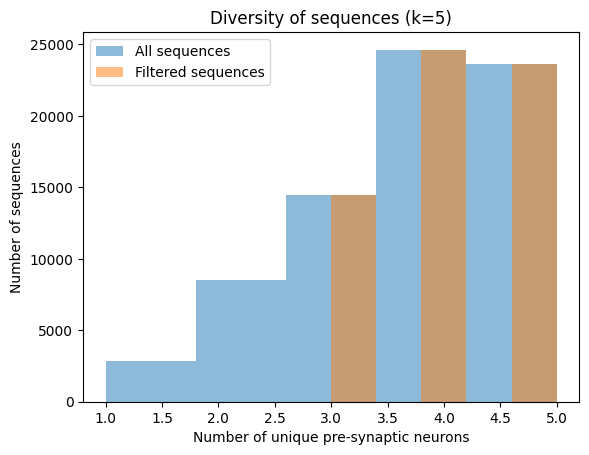

In [580]:
plot_diversity(sequences.to_numpy(), filtered_sequences)

In [581]:
# Make a plot of the diversity of the sequences versus the number of appearances
def plot_diversity_vs_appearances(sequences, appearances):
    sequence_diversity = [len(set(sequence)) for sequence in sequences]
    sequence_appearances = []
    for sequence in sequences:
        sequence = tuple(sequence)
        if sequence in appearances:
            sequence_appearances.append(appearances[sequence])
        elif sequence[::-1] in appearances:
            sequence_appearances.append(appearances[sequence[::-1]])
        else:
            sequence_appearances.append(0)
    plt.scatter(sequence_diversity, sequence_appearances, alpha=0.5)
    plt.title(f'Diversity vs. appearances of sequences (k={k})')
    plt.xlabel('Number of unique pre-synaptic neurons')
    plt.ylabel('Number of appearances')
    plt.show()

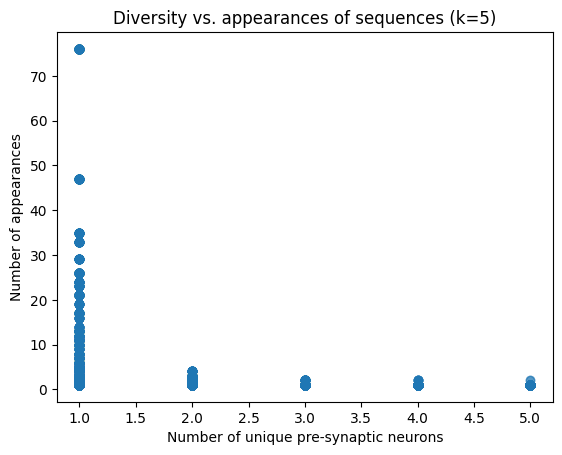

In [582]:
plot_diversity_vs_appearances(sequences.to_numpy(), appearances)

In [583]:
appearances_df.head()

,sequence,count,diversity
0,"(864691135420483058, 864691135463697733, 86469...",1,5
1,"(864691135776654432, 864691135776654432, 86469...",1,3
2,"(864691135404012526, 864691135660521712, 86469...",1,2
3,"(864691136378754261, 864691136903065778, 86469...",1,5
4,"(864691135488499770, 864691135462245533, 86469...",1,5


In [584]:
# Plot a histogram of the diversity of the sequences and the count of the sequences
def plot_diversity_vs_count(appearances_df):
    plt.scatter(appearances_df['diversity'], appearances_df['count'], alpha=0.5)
    plt.title(f'Diversity vs. count of sequences (k={k})')
    plt.xlabel('Number of unique pre-synaptic neurons')
    plt.ylabel('Number of appearances')
    plt.show()

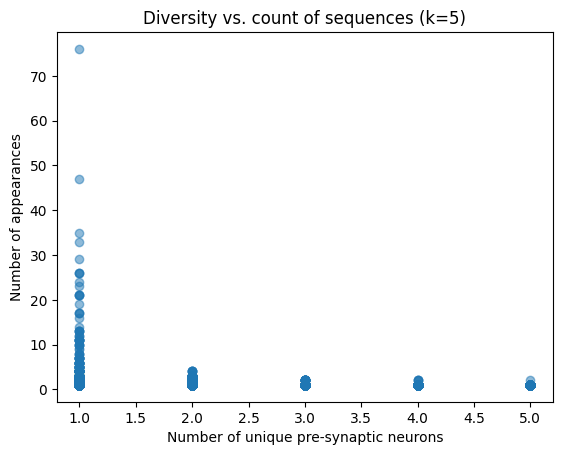

In [585]:
plot_diversity_vs_count(appearances_df)

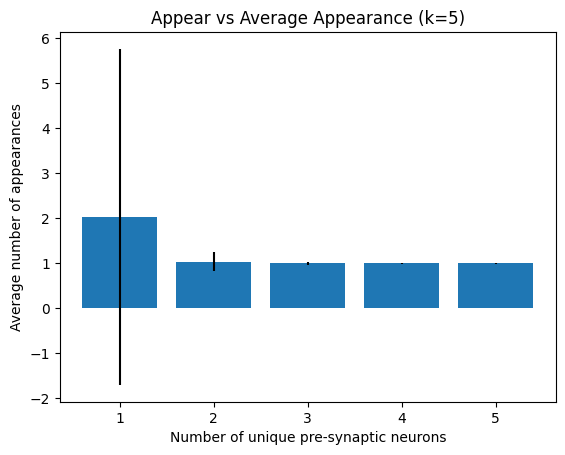

In [586]:
values, bins = [], []
error_bars = []
for i in range(k):
    bins.append(i+1)
    values.append(appearances_df.loc[appearances_df['diversity'] == i+1, 'count'].mean())
    error_bars.append(appearances_df.loc[appearances_df['diversity'] == i+1, 'count'].std())
plt.bar(bins, values)
plt.errorbar(bins, values, yerr=error_bars, fmt='None', ecolor='black')
plt.title(f'Appear vs Average Appearance (k={k})')
plt.xlabel('Number of unique pre-synaptic neurons')
plt.ylabel('Average number of appearances')
plt.show()

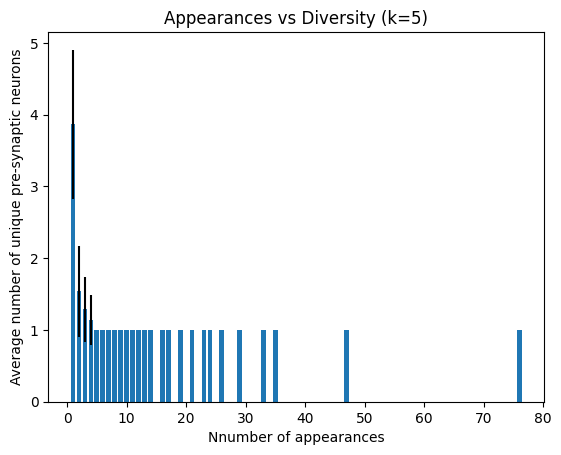

In [587]:
# Plot average diversity for each number of appearances with error bars
values, bins = [], []
error_bars = []
low_bound = appearances_df['count'].min()
high_bound = appearances_df['count'].max()
for i in range(low_bound, high_bound+1):
    bins.append(i)
    values.append(appearances_df.loc[appearances_df['count'] == i, 'diversity'].mean())
    error_bars.append(appearances_df.loc[appearances_df['count'] == i, 'diversity'].std())
plt.bar(bins, values)
plt.errorbar(bins, values, yerr=error_bars, fmt='None', ecolor='black')
plt.title(f'Appearances vs Diversity (k={k})')
plt.xlabel('Nnumber of appearances')
plt.ylabel('Average number of unique pre-synaptic neurons')
# plt.savefig(f'appearances_vs_diversity_k{k}.png')
plt.show()

In [588]:
display()